In [3]:
import torch
import cv2 
from matplotlib import pyplot as plt
import os,sys,glob
import numpy as np
import pandas as pd
import PIL
from IPython import display
from data.core.utils import get_dict_structure
from PIL import Image
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  # Arrange GPU devices starting from 0
os.environ["CUDA_VISIBLE_DEVICES"]= "1"  # Set the GPU 1 to use

In [4]:
from data.core.data_loader import load_whole_image 
data_path = "data/Samsung_SNU"
num_per_Ffolder = 16
whole_images = load_whole_image(data_path,num_per_Ffolder)

=== extracting [SET 1] ===
data/Samsung_SNU/[SET 1]/F32
data/Samsung_SNU/[SET 1]/F8
data/Samsung_SNU/[SET 1]/F64
data/Samsung_SNU/[SET 1]/F16
=== extracting [SET 2] ===
data/Samsung_SNU/[SET 2]/F32
data/Samsung_SNU/[SET 2]/F8
data/Samsung_SNU/[SET 2]/F64
data/Samsung_SNU/[SET 2]/F16
=== extracting [SET 3] ===
data/Samsung_SNU/[SET 3]/F32
data/Samsung_SNU/[SET 3]/F8
data/Samsung_SNU/[SET 3]/F64
data/Samsung_SNU/[SET 3]/F16
=== extracting [SET 4] ===
data/Samsung_SNU/[SET 4]/F32
data/Samsung_SNU/[SET 4]/F8
data/Samsung_SNU/[SET 4]/F64
data/Samsung_SNU/[SET 4]/F16


In [5]:
noise_dict = {}
for set_num in whole_images.keys():
    print(set_num)
    noise_dict[set_num] = {}
    for f_num in whole_images[set_num].keys():
        if f_num == 'F64':
            continue
        noise_dict[set_num][f_num] = {}
        #print(whole_images[set_num][f_num])
        for image_name, img in whole_images[set_num][f_num].items():
            #print(image_name,type(img))
            clean_image_name = f"{image_name.split('_')[0]}_F64.png"
            clean_image = whole_images[set_num]['F64'][clean_image_name]
            diff_image = img.astype('float') - clean_image.astype('float')
            #print(clean_image_name, clean_image.shape)
            noise_dict[set_num][f_num][f"{image_name}"] = diff_image
        

[SET 1]
[SET 2]
[SET 3]
[SET 4]


In [6]:
get_dict_structure(noise_dict)

=== dict structure ===
[SET 1], [SET 2], [SET 3], [SET 4], 
F32, F8, F16, 
1_F16.png, 2_F16.png, 3_F16.png, 4_F16.png, 5_F16.png, 6_F16.png, 7_F16.png, 8_F16.png, 9_F16.png, 10_F16.png, 11_F16.png, 12_F16.png, 13_F16.png, 14_F16.png, 15_F16.png, 16_F16.png, 


In [3]:
print("=== dict structure ===")
sub_dict = whole_images
while(True):
    try :
        for keys in sub_dict.keys():
            print(keys, end=", ")
        sub_dict = sub_dict[keys]
        print("")
    except : 
        break

=== dict structure ===
[SET 1], [SET 2], [SET 3], [SET 4], 
F32, F8, F64, F16, 
1_F16.png, 2_F16.png, 3_F16.png, 4_F16.png, 5_F16.png, 6_F16.png, 7_F16.png, 8_F16.png, 9_F16.png, 10_F16.png, 11_F16.png, 12_F16.png, 13_F16.png, 14_F16.png, 15_F16.png, 16_F16.png, 


SET1 F32 1
=== SET1 F32 image 1 ====
 Pixel min,mid,max : -238.0, -2.0, 231.0
 Pixel mean,std : -1.934,30.82


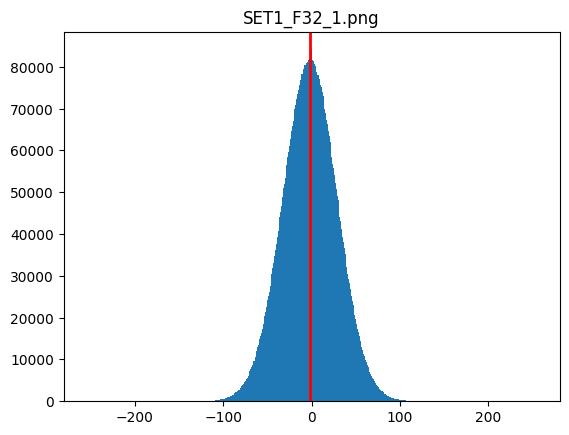

None

TypeError: imshow() missing 1 required positional argument: 'X'

In [7]:
plt_save_path = "./data/Samsung_SNU_noise_fig"
os.makedirs(plt_save_path,exist_ok=True)
tb = pd.DataFrame(columns=["set_num","f_num","image_num","min","max", "median", "mean", "std"])
bins = np.linspace(-255,255,512)
for set_num in noise_dict.keys():
    for f_num in noise_dict[set_num].keys():
        #print(whole_images[set_num][f_num])
        for image_name, image in noise_dict[set_num][f_num].items():
            #print(image_name,type(img))]]
            
            set_num_refined = set_num[1:-1]
            set_num_refined = set_num_refined[:3] + set_num_refined[-1]
            image_num = image_name.split("_")[0]
            print(set_num_refined,f_num,image_num)
        
            median = np.median(image.flatten())
            print(f"=== {set_num_refined} {f_num} image {image_num} ====")
            print(f" Pixel min,mid,max : {image.min()}, {median}, {image.max()}")
            print(f" Pixel mean,std : {round(image.mean(),3)},{round(image.std(),3)}")
            joined_info = "_".join([set_num_refined,f_num,image_num])
            image_title = joined_info + ".png"
            tb.loc[joined_info] = [set_num_refined, f_num, image_num,image.min(), image.max(), median, round(image.mean(),3), round(image.std(),3)]

            # plot histogram
            plt.title(image_title)
            plt.hist(image.flatten(),bins)
            plt.axvline(x=median, color='r', linewidth=2)
            display.display(plt.show())
            save_path = os.path.join(plt_save_path,image_title)
            plt.imshow()
            plt.savefig(save_path)
            # time.sleep(1)
            sys.exit(-1)
            display.clear_output(wait=True)

In [30]:
tb.to_csv("data/Samsung_SNU_meta/individual_noise_info.csv")
tb.head()

,set_num,f_num,image_num,min,max,median,mean,std
SET1_F32_1,SET1,F32,1,-238.0,231.0,-2.0,-1.934,30.820
SET1_F32_2,SET1,F32,2,-255.0,255.0,-2.0,-2.286,34.280
SET1_F32_3,SET1,F32,3,-255.0,226.0,-5.0,-4.989,29.582
SET1_F32_4,SET1,F32,4,-255.0,255.0,-5.0,-4.631,32.191
SET1_F32_5,SET1,F32,5,-255.0,255.0,-5.0,-5.110,36.719


In [31]:
# analysis per SET
tb_set1 = tb[tb["set_num"] == "SET1"]
tb_set2 = tb[tb["set_num"] == "SET2"]
tb_set3 = tb[tb["set_num"] == "SET3"]
tb_set4 = tb[tb["set_num"] == "SET4"]
tb_set4.head()

,set_num,f_num,image_num,min,max,median,mean,std
SET4_F32_1,SET4,F32,1,-172.0,211.0,0.0,0.457,26.744
SET4_F32_2,SET4,F32,2,-248.0,255.0,2.0,1.571,27.660
SET4_F32_3,SET4,F32,3,-255.0,255.0,0.0,-0.312,33.986
SET4_F32_4,SET4,F32,4,-255.0,255.0,0.0,0.014,28.145
SET4_F32_5,SET4,F32,5,-255.0,255.0,3.0,2.183,32.767


In [32]:
tb_sets = [tb_set1,tb_set2,tb_set3,tb_set4]
tb_set_statistic = pd.DataFrame(columns=["set_num","statistic","min","max", "median", "mean", "std"])
for tb_set in tb_sets:
    set_num = tb_set.iloc[0]['set_num']
    for ind in tb_set.columns:
        skip = False
        condition = ["num"] # ,"min", "max"
        for cond in condition:
            if cond in ind : 
                skip = True
                
        if skip is True:
            continue
        print(f" {set_num} {ind} \t: min,mid,max : {tb_set[ind].min()}, {round(tb_set[ind].median(),3)}, {tb_set[ind].max()}")
        print(f" {set_num} {ind} \t: mean,std    : {round(tb_set[ind].mean(),3)}, {round(tb_set[ind].std(),3)}")
        statistics = {"min" : tb_set[ind].min(), "median" : round(tb_set[ind].median(),3), "max" :tb_set[ind].max(), "mean" : round(tb_set[ind].mean(),3), "std" :  round(tb_set[ind].std(),3)}
        tb_set_statistic.loc[f"{set_num}_{ind}"] = [set_num, ind, statistics["min"], statistics["max"], statistics["median"], statistics["mean"], statistics["std"]]
    print("=========")
    
    


 SET1 min 	: min,mid,max : -255.0, -255.0, -238.0
 SET1 min 	: mean,std    : -254.646, 2.454
 SET1 max 	: min,mid,max : 226.0, 255.0, 255.0
 SET1 max 	: mean,std    : 253.708, 5.462
 SET1 median 	: min,mid,max : -12.0, -3.0, -1.0
 SET1 median 	: mean,std    : -4.25, 2.709
 SET1 mean 	: min,mid,max : -12.964, -4.088, -1.363
 SET1 mean 	: mean,std    : -4.743, 2.685
 SET1 std 	: min,mid,max : 29.582, 41.024, 46.768
 SET1 std 	: mean,std    : 40.049, 4.871
 SET2 min 	: min,mid,max : -255.0, -255.0, -222.0
 SET2 min 	: mean,std    : -253.542, 5.275
 SET2 max 	: min,mid,max : 210.0, 255.0, 255.0
 SET2 max 	: mean,std    : 252.104, 9.061
 SET2 median 	: min,mid,max : -15.0, -6.0, 7.0
 SET2 median 	: mean,std    : -5.812, 5.274
 SET2 mean 	: min,mid,max : -14.754, -5.542, 4.077
 SET2 mean 	: mean,std    : -5.952, 4.989
 SET2 std 	: min,mid,max : 26.48, 36.618, 49.572
 SET2 std 	: mean,std    : 37.022, 5.328
 SET3 min 	: min,mid,max : -255.0, -223.5, -144.0
 SET3 min 	: mean,std    : -218.729,

In [33]:
tb_set_statistic.to_csv("data/Samsung_SNU_meta/noise_per_set_info.csv")
tb_set_statistic.head()

,set_num,statistic,min,max,median,mean,std
SET1_min,SET1,min,-255.000,-238.000,-255.000,-254.646,2.454
SET1_max,SET1,max,226.000,255.000,255.000,253.708,5.462
SET1_median,SET1,median,-12.000,-1.000,-3.000,-4.250,2.709
SET1_mean,SET1,mean,-12.964,-1.363,-4.088,-4.743,2.685
SET1_std,SET1,std,29.582,46.768,41.024,40.049,4.871


In [46]:
tb_f_statistic.head()

,set_num,f_num,statistic,min,max,median,mean,std


In [50]:
tb_f_statistic = pd.DataFrame(columns=["set_num","f_num","statistic","min","max", "median", "mean", "std"]) # 
for i in range(1,5):
    f = 4
    for j in range(1,4):
        f *= 2
        print(i,f)
        set_num = f"SET{i}"
        f_num = f"F{f}"
        cond = (tb["set_num"] == set_num) & ( tb["f_num"] == f_num)
        tb_f = tb[cond]
        for ind in tb_f.columns:
            # print(ind)
            skip = False
            condition = ["num","min", "max"]
            for cond in condition:
                if cond in ind : 
                    skip = True

            if skip is True:
                continue
            
            print(f" {set_num} {ind} \t: min,mid,max : {tb_f[ind].min()}, {round(tb_f[ind].median(),3)}, {tb_f[ind].max()}")
            print(f" {set_num} {ind} \t: mean,std    : {round(tb_f[ind].mean(),3)}, {round(tb_f[ind].std(),3)}")
            statistics = {"min" : tb_f[ind].min(), "median" : round(tb_f[ind].median(),3), "max" :tb_f[ind].max(), "mean" : round(tb_f[ind].mean(),3), "std" :  round(tb_f[ind].std(),3)}
            #print(statistics)
            tb_f_statistic.loc[f"{set_num}_F{f}_{ind}"] = [set_num, f_num,ind, statistics["min"], statistics["max"], statistics["median"], statistics["mean"], statistics["std"]] # 
        
    

1 8
 SET1 median 	: min,mid,max : -12.0, -4.5, -1.0
 SET1 median 	: mean,std    : -5.25, 3.337
 SET1 mean 	: min,mid,max : -12.964, -5.296, -1.792
 SET1 mean 	: mean,std    : -6.007, 3.232
 SET1 std 	: min,mid,max : 42.708, 45.664, 46.768
 SET1 std 	: mean,std    : 45.419, 1.15
1 16
 SET1 median 	: min,mid,max : -9.0, -3.5, -1.0
 SET1 median 	: mean,std    : -4.5, 2.608
 SET1 mean 	: min,mid,max : -9.861, -4.514, -1.803
 SET1 mean 	: mean,std    : -4.988, 2.481
 SET1 std 	: min,mid,max : 37.328, 41.024, 42.456
 SET1 std 	: mean,std    : 40.409, 1.496
1 32
 SET1 median 	: min,mid,max : -5.0, -2.5, -1.0
 SET1 median 	: mean,std    : -3.0, 1.506
 SET1 mean 	: min,mid,max : -5.11, -3.048, -1.363
 SET1 mean 	: mean,std    : -3.234, 1.339
 SET1 std 	: min,mid,max : 29.582, 34.893, 37.178
 SET1 std 	: mean,std    : 34.319, 2.204
2 8
 SET2 median 	: min,mid,max : -15.0, -11.0, 7.0
 SET2 median 	: mean,std    : -9.0, 6.583
 SET2 mean 	: min,mid,max : -14.754, -11.298, 4.077
 SET2 mean 	: mean,s

In [51]:
tb_f_statistic.to_csv("data/Samsung_SNU_meta/noise_per_fnum_info.csv")
tb_f_statistic.sort_index()
tb_f_statistic.head(10)

,set_num,f_num,statistic,min,max,median,mean,std
SET1_F8_median,SET1,F8,median,-12.000,-1.000,-4.500,-5.250,3.337
SET1_F8_mean,SET1,F8,mean,-12.964,-1.792,-5.296,-6.007,3.232
SET1_F8_std,SET1,F8,std,42.708,46.768,45.664,45.419,1.150
SET1_F16_median,SET1,F16,median,-9.000,-1.000,-3.500,-4.500,2.608
SET1_F16_mean,SET1,F16,mean,-9.861,-1.803,-4.514,-4.988,2.481
SET1_F16_std,SET1,F16,std,37.328,42.456,41.024,40.409,1.496
SET1_F32_median,SET1,F32,median,-5.000,-1.000,-2.500,-3.000,1.506
SET1_F32_mean,SET1,F32,mean,-5.110,-1.363,-3.048,-3.234,1.339
SET1_F32_std,SET1,F32,std,29.582,37.178,34.893,34.319,2.204
SET2_F8_median,SET2,F8,median,-15.000,7.000,-11.000,-9.000,6.583
